In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A2 P4 BPI 2020,A2 P4 BPI 2020,Filter activities,Filter activities by sub-processes,2022-03-11 19:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
1,A2 P4 BPI 2020,A2 P4 BPI 2020,Group activities,Group activities by sub-processes,2022-03-11 20:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
2,A2 P4 BPI 2020,A2 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2022-03-11 21:24:15.966942,P4,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
3,A7 P4 BPI 2020,A7 P4 BPI 2020,Group activities,Group activities by role,2022-03-11 22:24:15.966942,P4,A7,2020,Academic,Manipulation,A72020,German Research Center for Artificial Intellig...
4,A7 P4 BPI 2020,A7 P4 BPI 2020,Calculate throughput,Calculate throughput,2022-03-11 23:24:15.966942,P4,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
950,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Group traces,Group traces by activities,2022-04-20 09:24:15.966942,P1-P2,A19,2020,Professional,Manipulation,A192020,Sberbank
951,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-04-20 10:24:15.966942,P1-P2,A19,2020,Professional,Calculate statistics,A192020,Sberbank
952,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate throughput,Calculate throughput,2022-04-20 11:24:15.966942,P1-P2,A19,2020,Professional,Analyze Time,A192020,Sberbank
953,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Represent temporal series,Represent temporal series of throughput,2022-04-20 12:24:15.966942,P1-P2,A19,2020,Professional,Representation,A192020,Sberbank


In [3]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [4]:
df_analisis = df.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Category', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Category']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Category':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Category,Year,Question
0,A1 P1 BPI 2017,"[Calculate cycle time, Calculate cycle time, F...",Student,2017,P1
1,A1 P1-P2 BPI 2020,"[Filter traces, Calculate cycle time, Calculat...",Academic,2020,P1-P2
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time, R...",Student,2019,P2
3,A1 P5 BPI 2015,"[Calculate cycle time, Identify organizational...",Professional,2015,P5
4,A1 P5 BPI 2020,"[Filter traces, Calculate cycle time, Find bot...",Academic,2020,P5
...,...,...,...,...,...
105,A8 P1 BPI 2017,"[Filter traces, Calculate waiting time, Repres...",Student,2017,P1
106,A8 P5 BPI 2015,"[Calculate cycle time, Compare cycle time, Gro...",Professional,2015,P5
107,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",Student,2017,P1
108,A9 P2 BPI 2019,"[Filter traces, Calculate cycle time, Identify...",Professional,2019,P2


In [5]:
#enfrentando analisis que responden a una misma pregunta
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','category','overlap','jaccard','sorensen']
df_metricas_todas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name)
    for i in range(len(group)):   
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
            category = group.iloc[i]['Category'] + "-" + group.iloc[j]['Category'] 
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis,'category':category,'overlap':overlap,'jaccard':jaccard,'sorensen':sorensen} 
            df_metricas_todas = df_metricas_todas.append(new_row, ignore_index=True)
        
df_metricas_todas 

,analisis,category,overlap,jaccard,sorensen
0,A1 P5 BPI 2015-A2 P5 BPI 2015,Professional-Student,0.250000,0.090909,0.166667
1,A1 P5 BPI 2015-A3 P5 BPI 2015,Professional-Professional,0.166667,0.076923,0.142857
2,A1 P5 BPI 2015-A4 P5 BPI 2015,Professional-Academic,0.250000,0.090909,0.166667
3,A1 P5 BPI 2015-A5 P5 BPI 2015,Professional-Academic,0.571429,0.363636,0.533333
4,A1 P5 BPI 2015-A6 P5 BPI 2015,Professional-Academic,0.428571,0.250000,0.400000
...,...,...,...,...,...
864,A30 P6 BPI 2020-A37 P6 BPI 2020,Academic-Professional,0.333333,0.142857,0.250000
865,A30 P6 BPI 2020-A7 P6 BPI 2020,Academic-Academic,0.666667,0.500000,0.666667
866,A35 P6 BPI 2020-A37 P6 BPI 2020,Professional-Professional,0.000000,0.000000,0.000000
867,A35 P6 BPI 2020-A7 P6 BPI 2020,Professional-Academic,0.500000,0.250000,0.400000


In [6]:
df_metricas_todas.mean()

overlap     0.521207
jaccard     0.257520
sorensen    0.379279
dtype: float64

In [7]:
df_metricas_todas = df_metricas_todas.replace({'Academic-Student':'Student-Academic'})
df_metricas_todas = df_metricas_todas.replace({'Professional-Student':'Student-Professional'})
df_metricas_todas = df_metricas_todas.replace({'Academic-Professional':'Professional-Academic'})

In [8]:
df_metricas_todas.groupby(by=['category']).mean()

,overlap,jaccard,sorensen
category,,,
Academic-Academic,0.597011,0.325988,0.462299
Professional-Academic,0.507093,0.253554,0.371587
Professional-Professional,0.458635,0.205851,0.308916
Student-Academic,0.536934,0.289001,0.426265
Student-Professional,0.558165,0.278834,0.408367
Student-Student,0.580090,0.286757,0.426165


In [9]:
df_estudiante = df[df['Category']=='Student']
df_academico = df[df['Category']=='Academic']
df_profesional = df[df['Category']=='Professional']

In [10]:
v = df_estudiante["concept:name"].value_counts()
p= v[v>df_estudiante["concept:name"].value_counts().mean()]
op_student = p.index

In [11]:
v = df_estudiante["Variant"].value_counts()
p= v[v>df_estudiante["Variant"].value_counts().mean()]
var_student = p.index

In [12]:
v = df_academico["concept:name"].value_counts()
p= v[v>df_academico["concept:name"].value_counts().mean()]
op_academic = p.index

In [13]:
v = df_academico["Variant"].value_counts()
# print(df_academico["Variant"].value_counts().mean())
p= v[v>df_academico["Variant"].value_counts().mean()]
# print(p)
var_academic = p.index
# var_academic

In [14]:
v = df_profesional["concept:name"].value_counts()
p= v[v>df_profesional["concept:name"].value_counts().mean()]
op_professional = p.index

In [15]:
v = df_profesional["Variant"].value_counts()
# print(df_profesional["Variant"].value_counts().mean())
p= v[v>df_profesional["Variant"].value_counts().mean()]
# print(p)
var_profesional = p.index
# var_profesional

In [16]:
#common operations between academics and students
for i in op_academic:
    if (i in op_student):
        print(i)

Calculate cycle time
Filter traces
Group traces
Find bottlenecks
Calculate number of elements


In [17]:
#common variants between academics and students
for i in var_academic:
    if (i in var_student):
        print(i)

Filter traces by activities
Find activities as bottlenecks applying temporal performance criteria
Calculate cycle time of the whole process for each subset of traces
Compare cycle time
Calculate percentage of traces
Calculate cycle time for all pairs of events for all traces
Calculate number of traces
Calculate cycle time of a fragment of the process for a subset of traces
Represent histograms of cycle time
Represent bar charts of cycle time
Calculate cycle time for all pairs of events for each subset of traces


In [18]:
#common operations between professionals and students
for i in op_professional:
    if (i in op_student):
        print(i)

Calculate cycle time
Calculate number of elements
Filter traces
Calculate percentages
Group traces
Find bottlenecks
Represent process map
Represent bar charts
Represent histograms


In [19]:
#common variants between professionals and students
for i in var_profesional:
    if (i in var_student):
        print(i)

Calculate number of traces
Represent process map with cycle time
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Find activities as bottlenecks applying temporal performance criteria
Represent histograms of cycle time
Group traces by activities
Calculate cycle time of a fragment of the process for a subset of traces
Calculate cycle time of the whole process for all traces
Calculate cycle time for all pairs of events for all traces
Calculate processing time
Calculate waiting time
Calculate cycle time of the whole process for each subset of traces
Represent bar charts of cycle time
Filter traces by attributes


In [20]:
#common operations between professionals and academics
for i in op_professional:
    if (i in op_academic):
        print(i)

Calculate cycle time
Calculate number of elements
Filter traces
Group traces
Find bottlenecks
Identify attributes
Compare cycle time
Calculate statistics


In [21]:
#common variants between professionals and academics
for i in var_profesional:
    if (i in var_academic):
        print(i)

Calculate number of traces
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Find activities as bottlenecks applying temporal performance criteria
Calculate cycle time of the whole process for a subset of traces
Represent histograms of cycle time
Calculate throughput
Identify values of attributes
Calculate cycle time of a fragment of the process for a subset of traces
Calculate cycle time for all pairs of events for all traces
Calculate number of activities
Group traces depending on attributes
Calculate Statistics of throughput
Calculate cycle time of the whole process for each subset of traces
Calculate Statistics of cycle time
Represent bar charts of cycle time
Calculate frequency of activities


In [22]:
#common variants between professionals, academics and students
for i in var_profesional:
    if (i in var_academic):
        if(i in var_student):
            print(i)

Calculate number of traces
Calculate percentage of traces
Compare cycle time
Filter traces by activities
Find activities as bottlenecks applying temporal performance criteria
Represent histograms of cycle time
Calculate cycle time of a fragment of the process for a subset of traces
Calculate cycle time for all pairs of events for all traces
Calculate cycle time of the whole process for each subset of traces
Represent bar charts of cycle time


In [23]:
#unique operations of professionals
for i in op_professional:
    if (i not in op_academic):
        if(i not in op_student):
            print(i)

Represent temporal series
Calculate frequency
Calculate throughput


In [24]:
#unique operations of academics
for i in op_academic:
    if (i not in op_professional):
        if(i not in op_student):
            print(i)

In [25]:
#unique operations of students
for i in op_student:
    if (i not in op_professional):
        if(i not in op_academic):
            print(i)

Calculate waiting time


In [26]:
#analisis de similitud entre perfiles por pregunta
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','category','overlap','jaccard','sorensen', 'question']
df_metricas_todas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name)
    for i in range(len(group)):   
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
            category = group.iloc[i]['Category'] + "-" + group.iloc[j]['Category'] 
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            question = name
            new_row={'analisis':analisis,'category':category,'overlap':overlap,'jaccard':jaccard,'sorensen':sorensen,
                    'question':question} 
            df_metricas_todas = df_metricas_todas.append(new_row, ignore_index=True)
        
df_metricas_todas 

,analisis,category,overlap,jaccard,sorensen,question
0,A1 P5 BPI 2015-A2 P5 BPI 2015,Professional-Student,0.250000,0.090909,0.166667,"(2015, P5)"
1,A1 P5 BPI 2015-A3 P5 BPI 2015,Professional-Professional,0.166667,0.076923,0.142857,"(2015, P5)"
2,A1 P5 BPI 2015-A4 P5 BPI 2015,Professional-Academic,0.250000,0.090909,0.166667,"(2015, P5)"
3,A1 P5 BPI 2015-A5 P5 BPI 2015,Professional-Academic,0.571429,0.363636,0.533333,"(2015, P5)"
4,A1 P5 BPI 2015-A6 P5 BPI 2015,Professional-Academic,0.428571,0.250000,0.400000,"(2015, P5)"
...,...,...,...,...,...,...
864,A30 P6 BPI 2020-A37 P6 BPI 2020,Academic-Professional,0.333333,0.142857,0.250000,"(2020, P6)"
865,A30 P6 BPI 2020-A7 P6 BPI 2020,Academic-Academic,0.666667,0.500000,0.666667,"(2020, P6)"
866,A35 P6 BPI 2020-A37 P6 BPI 2020,Professional-Professional,0.000000,0.000000,0.000000,"(2020, P6)"
867,A35 P6 BPI 2020-A7 P6 BPI 2020,Professional-Academic,0.500000,0.250000,0.400000,"(2020, P6)"


In [27]:
df_metricas_todas = df_metricas_todas.replace({'Academic-Student':'Student-Academic'})
df_metricas_todas = df_metricas_todas.replace({'Professional-Student':'Student-Professional'})
df_metricas_todas = df_metricas_todas.replace({'Academic-Professional':'Professional-Academic'})

In [28]:
df_metricas_todas.groupby(['question', 'category']).mean()
# df_preg.groupby(['category']).mean()

overlap   jaccard  sorensen
question      category                                               
(2015, P5)    Academic-Academic          0.553571  0.321639  0.470296
              Professional-Academic      0.432540  0.228824  0.363233
              Professional-Professional  0.347222  0.180403  0.298599
              Student-Academic           0.583333  0.322984  0.479004
              Student-Professional       0.430556  0.222805  0.353885
              Student-Student            0.500000  0.200000  0.333333
(2017, P1)    Academic-Academic          0.250000  0.125000  0.222222
              Professional-Academic      0.458333  0.247487  0.388870
              Professional-Professional  0.598571  0.304841  0.459755
              Student-Academic           0.450000  0.209490  0.337888
              Student-Professional       0.564347  0.280739  0.421161
              Student-Student            0.582021  0.281273  0.418570
(2019, P2)    Academic-Academic          1.000000  0.400000  0.571429
              Professional-Academic      0.759167  0.373876  0.536940
              Professional-Professional  0.539268  0.270019  0.415560
              Student-Academic           0.632857  0.316941  0.473794
              Student-Professional       0.510289  0.264410  0.409709
              Student-Student            0.538413  0.282915  0.431825
(2020, P1-P2) Academic-Academic          0.554762  0.267034  0.410740
              Professional-Academic      0.465118  0.238085  0.359273
              Professional-Professional  0.479046  0.230176  0.346373
              Student-Academic           0.527778  0.258405  0.366989
              Student-Professional       0.642361  0.294527  0.414448
              Student-Student            1.000000  0.500000  0.666667
(2020, P4)    Academic-Academic          0.333333  0.333333  0.333333
              Professional-Academic      0.381944  0.170811  0.242637
              Professional-Professional  0.319228  0.113080  0.175897
              Student-Academic           0.388889  0.194444  0.314286
              Student-Professional       0.347222  0.145833  0.226792
              Student-Student            0.333333  0.200000  0.333333
(2020, P5)    Academic-Academic          0.722222  0.386296  0.534545
              Professional-Academic      0.621290  0.312999  0.441421
              Professional-Professional  0.536720  0.237518  0.353926
              Student-Academic           0.694444  0.444213  0.597980
              Student-Professional       0.658333  0.371955  0.499028
              Student-Student            0.666667  0.500000  0.666667
(2020, P6)    Academic-Academic          0.555556  0.344444  0.488889
              Professional-Academic      0.494048  0.242560  0.356519
              Professional-Professional  0.542857  0.255480  0.355751
              Student-Academic           0.541667  0.362500  0.516667
              Student-Professional       0.738095  0.386054  0.529365
              Student-Student            0.666667  0.500000  0.666667

In [29]:
df_metricas_todas.groupby(['question', 'category']).var(ddof=0)

jaccard   overlap  sorensen
question      category                                               
(2015, P5)    Academic-Academic          0.017363  0.038490  0.027235
              Professional-Academic      0.008340  0.024857  0.015372
              Professional-Professional  0.005567  0.018904  0.012497
              Student-Academic           0.009588  0.029053  0.015749
              Student-Professional       0.010102  0.015432  0.016554
              Student-Student            0.000000  0.000000  0.000000
(2017, P1)    Academic-Academic          0.000000  0.000000  0.000000
              Professional-Academic      0.007787  0.016644  0.012563
              Professional-Professional  0.008467  0.029383  0.011366
              Student-Academic           0.007257  0.028846  0.014781
              Student-Professional       0.018722  0.049100  0.026665
              Student-Student            0.022124  0.061556  0.031915
(2019, P2)    Academic-Academic          0.000000  0.000000  0.000000
              Professional-Academic      0.008613  0.054673  0.011862
              Professional-Professional  0.009369  0.015814  0.016222
              Student-Academic           0.008697  0.030976  0.011384
              Student-Professional       0.008471  0.026947  0.013822
              Student-Student            0.010505  0.026939  0.013487
(2020, P1-P2) Academic-Academic          0.010648  0.042175  0.017578
              Professional-Academic      0.023617  0.068769  0.042501
              Professional-Professional  0.026560  0.086227  0.045464
              Student-Academic           0.046210  0.116127  0.066863
              Student-Professional       0.041799  0.144953  0.067538
              Student-Student            0.000000  0.000000  0.000000
(2020, P4)    Academic-Academic          0.222222  0.222222  0.222222
              Professional-Academic      0.044120  0.183787  0.076424
              Professional-Professional  0.024787  0.140134  0.039825
              Student-Academic           0.008488  0.033951  0.021497
              Student-Professional       0.022263  0.124807  0.046002
              Student-Student            0.000000  0.000000  0.000000
(2020, P5)    Academic-Academic          0.031332  0.065432  0.032006
              Professional-Academic      0.045424  0.074148  0.049496
              Professional-Professional  0.030143  0.099376  0.046863
              Student-Academic           0.024250  0.045525  0.025640
              Student-Professional       0.057873  0.079097  0.063893
              Student-Student            0.000000  0.000000  0.000000
(2020, P6)    Academic-Academic          0.031265  0.052469  0.032099
              Professional-Academic      0.033788  0.112068  0.054357
              Professional-Professional  0.057101  0.165306  0.076915
              Student-Academic           0.019219  0.019097  0.023056
              Student-Professional       0.038280  0.074263  0.038842
              Student-Student            0.000000  0.000000  0.000000

In [30]:
df_metricas_todas.groupby(['question', 'category']).std(ddof=0)

jaccard   overlap  sorensen
question      category                                               
(2015, P5)    Academic-Academic          0.131768  0.196188  0.165030
              Professional-Academic      0.091324  0.157660  0.123983
              Professional-Professional  0.074610  0.137493  0.111790
              Student-Academic           0.097917  0.170450  0.125495
              Student-Professional       0.100510  0.124226  0.128662
              Student-Student            0.000000  0.000000  0.000000
(2017, P1)    Academic-Academic          0.000000  0.000000  0.000000
              Professional-Academic      0.088243  0.129010  0.112086
              Professional-Professional  0.092019  0.171415  0.106611
              Student-Academic           0.085191  0.169842  0.121579
              Student-Professional       0.136829  0.221585  0.163293
              Student-Student            0.148742  0.248105  0.178648
(2019, P2)    Academic-Academic          0.000000  0.000000  0.000000
              Professional-Academic      0.092808  0.233822  0.108915
              Professional-Professional  0.096796  0.125752  0.127366
              Student-Academic           0.093257  0.176001  0.106697
              Student-Professional       0.092040  0.164155  0.117565
              Student-Student            0.102495  0.164132  0.116133
(2020, P1-P2) Academic-Academic          0.103191  0.205365  0.132582
              Professional-Academic      0.153680  0.262238  0.206157
              Professional-Professional  0.162971  0.293644  0.213224
              Student-Academic           0.214965  0.340773  0.258579
              Student-Professional       0.204447  0.380727  0.259881
              Student-Student            0.000000  0.000000  0.000000
(2020, P4)    Academic-Academic          0.471405  0.471405  0.471405
              Professional-Academic      0.210048  0.428703  0.276450
              Professional-Professional  0.157440  0.374345  0.199561
              Student-Academic           0.092128  0.184257  0.146617
              Student-Professional       0.149207  0.353280  0.214481
              Student-Student            0.000000  0.000000  0.000000
(2020, P5)    Academic-Academic          0.177008  0.255797  0.178902
              Professional-Academic      0.213130  0.272301  0.222476
              Professional-Professional  0.173616  0.315239  0.216478
              Student-Academic           0.155723  0.213365  0.160126
              Student-Professional       0.240567  0.281242  0.252771
              Student-Student            0.000000  0.000000  0.000000
(2020, P6)    Academic-Academic          0.176820  0.229061  0.179161
              Professional-Academic      0.183815  0.334765  0.233147
              Professional-Professional  0.238958  0.406579  0.277336
              Student-Academic           0.138632  0.138193  0.151841
              Student-Professional       0.195652  0.272512  0.197084
              Student-Student            0.000000  0.000000  0.000000

In [31]:
df_prueba = df
n_acciones = df_prueba['Category'].value_counts()
n_acciones

Professional    502
Student         273
Academic        180
Name: Category, dtype: int64

In [32]:
#promedio de acciones por analisis
cat_año = df_prueba.groupby(['Category', 'Year'])
n_analisis = cat_año.apply(lambda x: len(x["Report"].unique()))
print('Académico:', n_acciones['Academic']/n_analisis['Academic'].sum())
print('Estudiante:', n_acciones['Student']/n_analisis['Student'].sum())
print('Profesional:', n_acciones['Professional']/n_analisis['Professional'].sum())

Académico: 12.857142857142858
Estudiante: 12.409090909090908
Profesional: 19.307692307692307


In [33]:
cat = df_prueba.groupby(['Category'])
n_respuestas = cat.apply(lambda x: len(x["case:concept:name"].unique()))
n_respuestas

Category
Academic        27
Professional    55
Student         28
dtype: int64

In [34]:
#promedio de acciones por respuesta
acciones_por_respuesta = n_acciones/n_respuestas
acciones_por_respuesta

Academic        6.666667
Professional    9.127273
Student         9.750000
dtype: float64

In [35]:
diff_actions_category=df_prueba.groupby(['Category',"case:concept:name"]).apply(lambda x: len(x['concept:name'].unique())).reset_index()
diff_actions_category.groupby("Category").mean()

,0
Category,
Academic,4.518519
Professional,5.290909
Student,6.035714


In [36]:
df_estudiante = df_prueba[df_prueba['Category']=='Student']
df_academico = df_prueba[df_prueba['Category']=='Academic']
df_profesional = df_prueba[df_prueba['Category']=='Professional']

In [37]:
#operaciones más frecuentes estudiantes
v = df_estudiante["concept:name"].value_counts()
print(df_estudiante["concept:name"].value_counts().mean())
v[v>df_estudiante["concept:name"].value_counts().mean()]

8.029411764705882


Calculate cycle time            45
Filter traces                   28
Find bottlenecks                23
Represent process map           21
Calculate percentages           20
Calculate waiting time          20
Calculate number of elements    17
Group traces                    14
Represent bar charts            14
Represent histograms            14
Name: concept:name, dtype: int64

In [38]:
#operaciones más frecuentes academicos
v = df_academico["concept:name"].value_counts()
print(df_academico["concept:name"].value_counts().mean())
v[v>df_academico["concept:name"].value_counts().mean()]

6.206896551724138


Calculate cycle time            34
Filter traces                   19
Calculate statistics            18
Group traces                    15
Find bottlenecks                14
Calculate number of elements    10
Identify attributes              8
Compare cycle time               7
Name: concept:name, dtype: int64

In [39]:
#operaciones más frecuentes profesionales
v = df_profesional["concept:name"].value_counts()
print(df_profesional["concept:name"].value_counts().mean())
v[v>df_profesional["concept:name"].value_counts().mean()]

11.155555555555555


Calculate cycle time            73
Calculate number of elements    49
Filter traces                   39
Calculate percentages           29
Group traces                    29
Find bottlenecks                26
Represent temporal series       23
Represent process map           22
Identify attributes             22
Compare cycle time              18
Represent bar charts            18
Calculate statistics            17
Calculate frequency             14
Represent histograms            14
Calculate throughput            12
Name: concept:name, dtype: int64

In [40]:
#variantes más frecuentes estudiantes
v_estudiante = df_estudiante["Variant"].value_counts()
print(df_estudiante["Variant"].value_counts().mean())
op_frec_student=v_estudiante[v_estudiante>df_estudiante["Variant"].value_counts().mean()]
op_frec_student

3.73972602739726


Calculate waiting time                                                      20
Filter traces by activities                                                 17
Calculate percentage of traces                                              17
Find activities as bottlenecks applying temporal performance criteria       16
Represent process map with cycle time                                       14
Calculate number of traces                                                  14
Represent histograms of cycle time                                          12
Filter traces by attributes                                                  8
Calculate cycle time of the whole process for all traces                     8
Represent process map with frequency                                         7
Calculate cycle time of a fragment of the process for a subset of traces     7
Represent bar charts of attributes                                           6
Calculate cycle time for all pairs of events for all

In [41]:
#variantes más frecuentes academicos
v = df_academico["Variant"].value_counts()
print(df_academico["Variant"].value_counts().mean())
op_frec_acad=v[v>df_academico["Variant"].value_counts().mean()]

2.903225806451613


In [42]:
#variantes más frecuentes profesionales
v = df_profesional["Variant"].value_counts()
print(df_profesional["Variant"].value_counts().mean())
op_frec_pro=v[v>df_profesional["Variant"].value_counts().mean()]

4.5636363636363635


In [43]:
op_academicas = df_academico['concept:name'].unique()
v_academicas = df_academico['Variant'].unique()
op_estudiante = df_estudiante['concept:name'].unique()
v_estudiante = df_estudiante['Variant'].unique()
op_profesional = df_profesional['concept:name'].unique()
v_profesional = df_profesional['Variant'].unique()

In [44]:
lista_op_a=[]
lista_op_p=[]
lista_op_e=[]
lista_op_ape=[]
comun=[]

for op_a in op_academicas:
    if op_a in op_estudiante:
        if op_a in op_profesional:
            lista_op_ape.append(op_a)
            

for op_a in op_academicas:
    if op_a in op_estudiante or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_a.append(op_a)
        
for op_a in op_estudiante:
    if op_a in op_academicas or op_a in op_profesional:
        comun.append(op_a)
    else:
        lista_op_e.append(op_a)
        
for op_a in op_profesional:
    if op_a in op_academicas or op_a in op_estudiante:
        comun.append(op_a)
    else:
        lista_op_p.append(op_a)

In [45]:
lista_op_a

['Identify impact of bottlenecks by organizational unit',
 'Represent boxplots of cycle time',
 'Represent density diagram of cycle time',
 'Assign resource to each activity',
 'Group events by attributes']

In [46]:
lista_op_e

['Apply decision trees',
 'Group organizational units',
 'Discover process maps',
 'Group events by time',
 'Apply machine learning techniques',
 'Discover happy path of the process']

In [47]:
lista_op_p

['Filter variants depending on frequency',
 'Calculate average of activities per trace',
 'Calculate intervals of time of the traces',
 'Analyze cycle time depending on the events',
 'Identify specific subprocesses',
 'Calculate dates of the development of activities of resources',
 'Filter sub-processes',
 'Represent lineal distribution of an attribute by traces',
 'Group sub-processes',
 'Represent correlation graph of variables',
 'Identify traces by cycle time',
 'Compare processing time']

In [48]:
lista_v_a=[]
lista_v_p=[]
lista_v_e=[]
lista_v_ape=[]
comun=[]

for v_a in v_academicas:
    if v_a in v_estudiante:
        if v_a in v_profesional:
            lista_v_ape.append(v_a)
            

for v_a in v_academicas:
    if v_a in v_estudiante or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_a.append(v_a)
        
for v_a in v_estudiante:
    if v_a in v_academicas or v_a in v_profesional:
        comun.append(v_a)
    else:
        lista_v_e.append(v_a)
        
for v_a in v_profesional:
    if v_a in v_academicas or v_a in v_estudiante:
        comun.append(v_a)
    else:
        lista_v_p.append(v_a)

In [49]:
lista_v_a

['Group activities by time',
 'Identify impact of bottlenecks by organizational unit',
 'Represent boxplots of cycle time',
 'Represent density diagram of cycle time',
 'Assign resource to each activity',
 'Group activities using clustering',
 'Group traces by sub-processes',
 'Identify organizational units by resources',
 'Identify attributes by traces',
 'Group events by attributes',
 'Group traces by month',
 'Filter traces by subprocesses']

In [50]:
lista_v_e

['Filter activities by sub-processes',
 'Filter events by cycle time',
 'Apply decision trees',
 'Group organizational units',
 'Calculate frequency of events',
 'Discover process maps',
 'Group traces by waiting',
 'Calculate frequency of resources',
 'Represent histograms of waiting time',
 'Group events by time',
 'Apply machine learning techniques',
 'Discover happy path of the process',
 'Identify resources by cycle time',
 'Group traces by endpoints']

In [51]:
lista_v_p

['Filter variants depending on frequency',
 'Calculate average of activities per trace',
 'Group traces by roles',
 'Find sub-processes with incorrect orders with respect to the happy path as bottlenecks',
 'Calculate frequency of variants',
 'Calculate intervals of time of the traces',
 'Calculate number of variants',
 'Calculate number of different organizational units',
 'Group traces by organizational units',
 'Analyze cycle time depending on the events',
 'Group traces by year',
 'Identify specific subprocesses',
 'Represent histograms of attributes',
 'Calculate dates of the development of activities of resources',
 'Identify activity with biggest backlog',
 'Represent temporal series of subprocesses',
 'Calcute number of values of an attribute',
 'Group traces according to the repetition of activities',
 'Filter activities by resource',
 'Filter traces by year',
 'Calculate number of sub-processes',
 'Filter sub-processes by cycle time',
 'Calculate percentage of sub-processes',

In [52]:
p = df_estudiante.groupby(["Year", "Question"])
g= p.apply(lambda x: len(x["case:concept:name"].unique()))
# g = p['case:concept:name'].size()
g

Year  Question
2015  P5           2
2017  P1          13
2019  P2           5
2020  P1-P2        2
      P4           2
      P5           2
      P6           2
dtype: int64

In [53]:
p = df_estudiante.groupby(["Year", "Question"]).size()
p

Year  Question
2015  P5           13
2017  P1          156
2019  P2           76
2020  P1-P2        10
      P4            6
      P5            6
      P6            6
dtype: int64

In [54]:
p/g

Year  Question
2015  P5           6.5
2017  P1          12.0
2019  P2          15.2
2020  P1-P2        5.0
      P4           3.0
      P5           3.0
      P6           3.0
dtype: float64

In [55]:
q = df_estudiante.groupby(['Year'])
# q.apply(lambda x: len(x["case:concept:name"].unique()))
q["case:concept:name"].size()

Year
2015     13
2017    156
2019     76
2020     28
Name: case:concept:name, dtype: int64

In [56]:
len(df_estudiante['case:concept:name'])/(len(df_estudiante['case:concept:name'].unique()))

9.75

In [57]:
df_academico['concept:name'].value_counts()

Calculate cycle time                                     34
Filter traces                                            19
Calculate statistics                                     18
Group traces                                             15
Find bottlenecks                                         14
Calculate number of elements                             10
Identify attributes                                       8
Compare cycle time                                        7
Calculate percentages                                     6
Calculate throughput                                      5
Identify organizational units                             5
Represent bar charts                                      4
Represent histograms                                      4
Represent process map                                     4
Group activities                                          3
Calculate frequency                                       3
Filter activities                       

In [58]:
df_academico['Variant'].value_counts()

Calculate Statistics of cycle time                                                 14
Filter traces by activities                                                        12
Group traces depending on attributes                                               11
Find activities as bottlenecks applying temporal performance criteria              10
Calculate cycle time of the whole process for each subset of traces                 8
                                                                                   ..
Identify attributes by traces                                                       1
Represent heat maps of cycle time and an attribute                                  1
Find organizational units as bottlenecks applying temporal performance criteria     1
Identify impact of bottlenecks by organizational unit                               1
Identify organizational units by traces                                             1
Name: Variant, Length: 62, dtype: int64

In [59]:
df_tipo=df_prueba
tipos_op_agrupado_category=df_tipo.groupby("Category")['Type'].value_counts()
sumCategory=[tipos_op_agrupado_category[tipos_op_agrupado_category.index.get_level_values
                                        ('Category')==val].sum() for val in ['Student','Professional','Academic']]

In [60]:
for index,value in tipos_op_agrupado_category.items():
    if 'Student' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[0])*100
    elif 'Professional' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[1])*100
    elif 'Academic' in index:
        tipos_op_agrupado_category[index]=(value/sumCategory[2])*100

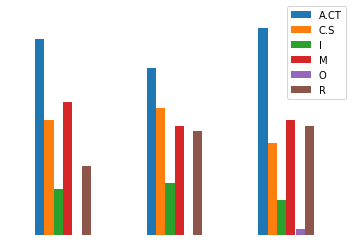

In [61]:
tipos_op_agrupado_category.unstack().plot(kind='bar')
# fig, ax = plt.subplots()
# ax.axis("off")

plt.legend(["A.CT","C.S","I","M","O","R"],bbox_to_anchor = (0.82, 0.6))
plt.ylabel("Percentage of operations")
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xticks(rotation=360)

# ax.spines['right'].set_visible(False)
plt.axis('off')
plt.show()


In [62]:
df_graph=df_tipo.groupby("Category")['Type'].value_counts().to_frame()
df_graph.reset_index(level=0, inplace=True)

In [63]:
df_graph=df_graph.rename(columns={"Type": "Percentages"})

In [64]:
df_graph.reset_index(level=0, inplace=True)

In [65]:
tam_grupos=df_graph.groupby("Category").apply(lambda x: sum(x['Percentages']))
tam_grupos

Category
Academic        180
Professional    502
Student         273
dtype: int64

In [66]:
tam_grupos["Student"]

273

In [67]:
listaNueva=[]
for row in df_graph.iterrows():
    tam=tam_grupos[row[1]['Category']]
    new_per=row[1]['Percentages']/tam
    listaNueva.append(new_per)

In [68]:
df_graph['Percentages']=listaNueva
df_graph['Percentages']=df_graph['Percentages']*100
df_graph

,Type,Category,Percentages
0,Analyze Time,Academic,34.444444
1,Manipulation,Academic,23.888889
2,Calculate statistics,Academic,20.555556
3,Representation,Academic,12.222222
4,Identification,Academic,8.333333
5,Others,Academic,0.555556
6,Analyze Time,Professional,29.083665
7,Calculate statistics,Professional,22.310757
8,Manipulation,Professional,19.721116
9,Representation,Professional,18.525896


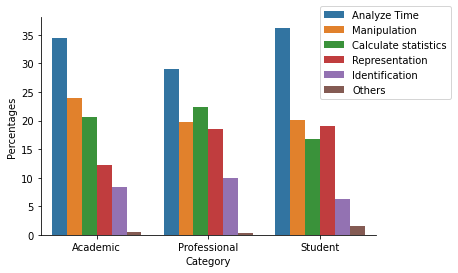

In [69]:
ax = sns.barplot(x="Category", y="Percentages", hue="Type", data=df_graph)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(bbox_to_anchor = (0.82, 0.6))
# plt.savefig('categoriesPercentages2.pdf')

In [70]:
tipos_op_agrupado_category.unstack()

Type,Analyze Time,Calculate statistics,Identification,Manipulation,Others,Representation
Category,,,,,,
Academic,34,20,8,23,0,12
Professional,29,22,9,19,0,18
Student,36,16,6,20,1,19


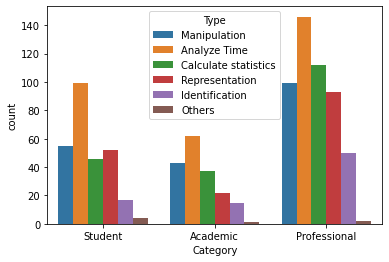

In [71]:
h = sns.countplot(x='Category', hue='Type' , data=df_tipo)

In [72]:
df = df_tipo
x, y, hue = "Category", "Type", "Type"
hue_order = ["Male", "Female"]

In [73]:
tipos_op_agrupado_category

Category      Type                
Academic      Analyze Time            34
              Manipulation            23
              Calculate statistics    20
              Representation          12
              Identification           8
              Others                   0
Professional  Analyze Time            29
              Calculate statistics    22
              Manipulation            19
              Representation          18
              Identification           9
              Others                   0
Student       Analyze Time            36
              Manipulation            20
              Representation          19
              Calculate statistics    16
              Identification           6
              Others                   1
Name: Type, dtype: int64

In [74]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["concept:name"]).intersection(set(operationsCategory2["concept:name"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df[category1]=listaCoincidencias

In [75]:
df

,Student,Professional,Academic
Student,0,28,19
Professional,28,0,24
Academic,19,24,0


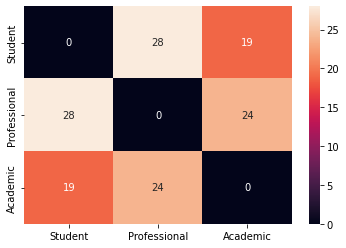

In [76]:
sns.heatmap(df, annot=True)

In [77]:
categories1=['Student','Professional','Academic']
categories2=['Student','Professional','Academic']
df2 = pd.DataFrame(index=['Student','Professional','Academic'],columns=['Student','Professional','Academic'])
for category1 in categories1:
    operationsCategory1=df_tipo[df_tipo["Category"]==category1]
    listaCoincidencias=[]
    for category2 in categories2:
        operationsCategory2=df_tipo[df_tipo["Category"]==category2]
        intersec=len(list(set(operationsCategory1["Variant"]).intersection(set(operationsCategory2["Variant"]))))
        if(category1==category2):
            intersec=0
        listaCoincidencias.append(intersec)
        
    df2[category1]=listaCoincidencias

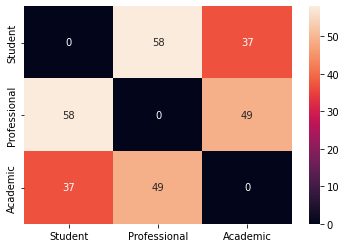

In [78]:
sns.heatmap(df2, annot=True)